# HW 1
### EE 399 Machine Learning for Science and Engineering

Completed by: Ewan Lister on 04/03/2023


Set up your own GitHub account (private) and share your Git with me and the TAs (Trung Le and Nithin Joseph): kutz@uw.edu, tle45@uw.edu, nphilipj@uw.edu

Status: Done, GitHub can be accessed via this [link](https://github.com/ewan-lister/EE-399).


## Problem 1

Consider the data from lecture on 3/31:

     X=np.arange(0,31)
     Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
     40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

Fit data to a least squares metric, and this model: $ f(x) = A\cos{Bx} + Cx + D$ 

(i) Write a code to find the minimum error and determine the parameters A,B,C,D.




In [1]:
# imports
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt


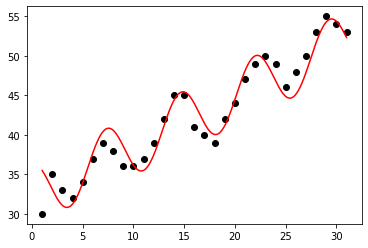

In [20]:
# define data
X = np.arange(0,31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
     40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

# number of inputs
num_in = len(Y)

# proposed fit for data
# accepts input value as well as models parameters (floats)
def model(x, c):
    y = c[0] * np.cos(c[1] * x) + (c[2] * x) + c[3]
    return y

# define the objective function for optimization
def error(c, x, y, num_in):
    e2 = np.sqrt((np.sum(model(x, c) - y) ** 2) / num_in)
    return e2

# set the initial guess for the parameters
c0 = np.array([4, np.pi/3.5, 0.6, 30])

# perform optimization
res = opt.minimize(error, c0, args=(np.arange(1,num_in + 1), Y, num_in), method='Nelder-Mead')

# get the optimized parameters
c = res.x

# generate the data for plotting
tt = np.arange(1, num_in + 0.01, 0.01)
yfit = (c[0]*np.cos(c[1]*tt)+(c[2] * tt) + c[3])

# plot the raw data and the fitted curve
plt.plot(np.arange(1, num_in + 1), Y, 'ko')
plt.plot(tt, yfit, 'r-')
plt.show()



(ii) With the results of (i), fix two of the parameters and sweep through values of the other two parameters to generate a 2D loss (error) landscape. Do all combinations of two fixed parameters and two swept parameters. You can use something like pcolor to visualize the results in a grid. How many minima can you find as you sweep through parameters?


In [ ]:
# condense previous operations into a single function fit_data for usage in proceeding
# exercizes
def fit_data(num_in, c0, Y):
    # perform optimization
    res = opt.minimize(error, c0, args=(np.arange(1,num_in + 1), Y, num_in), method='Nelder-Mead')
    # get the optimized parameters
    c = res.x
    # generate the data for plotting
    tt = np.arange(1, num_in + 0.01, 0.01)
    yfit = (c[0]*np.cos(c[1]*tt)+(c[2] * tt) + c[3])
    # plot the raw data and the fitted curve
    plt.plot(np.arange(1, num_in + 1), Y, 'ko')
    plt.plot(tt, yfit, 'r-')
    plt.show()

# manipulate c0 once more
c0 = np.array([5, np.pi/5, 1, 30])

plot_dim = 100
plot_granularity = 10 # 10 gradations per integer

# we should create an array whose indeces contain the error of the model for a given row and column
# corresponding to c0[n] and c0[m]

# accepts a 2d array of floats
# plots array as a color map
def plot_color(e1_array):
    plt.pcolormesh(e1_array)

# accepts model parameters c0 (list of floats)
# as well list of idex of parameters to be swept (list of int)
# additionally accepts array_dim and array_granularity
# for determining dimensions of returned array and fineness
# of array
# returns an array containing the error of a model
# as a function of swept parameters
def sweep_parameters(c0, par, plot_dim, plot_granularity):
    dim = plot_dim * plot_granularity
    # first set up function which creates an array
    error_array = np.zeros((dim, dim))

    # iterates through zero array and initializes with swept value of error
    # function, where chosen parameters par[0] and par[1] are x and y respectively
    with np.nditer(error_array, op_flags=['readwrite']) as it:
        for space in it:
            [x, y] = it.multi_index
            c0[par[0]] = x
            c0[par[1]] = y
            space[...] = error(c0, x, y, num_in)




